(contact-temp)=
# Kontakt-Thermometrie

:::{admonition} **Lernziele**
- Mechanismen der Kontakt-Thermometrie verstehen
- mit Widerstandsthermometern und Thermoelementen
- um Temperaturmessungen beurteilen zu können
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import schemdraw
import schemdraw.elements as elm
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('schemdraw', schemdraw.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.1
matplotlib 3.9.2
pandas 2.2.3
schemdraw 0.19
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if shutil.which('latex'):
    plt.rcParams['text.usetex'] = True

## Wärmeübertragung bei der Kontaktmessung

Wärme lässt sich auf drei Arten übertragen: Strahlung, Leitung und Konvektion. Häufig spielen alle drei Effekte eine Rolle. **Kontakt-Thermometer** nutzen im Wesentlichen **Wärmeleitung und / oder Wärmekonvektion**.

Das Sensorelement nimmt nach einer **Angleichungszeit** einen stationären Temperaturwert an. Die Angleichungszeit hängt davon ab, wie groß die **Wärmekapazität des Sensorelements** ist und durch welche **Effekte das Sensorelement gekühlt oder erwärmt** wird.

Die Messung von Oberflächentemperaturen ist ein Spezialfall der Temperaturmessung von Körpern. Wenn sich die Temperatur des Körpers von der seiner Umgebung unterscheidet, so findet ein Wärmetransport durch Konvektion und / oder Strahlung zwischen der Oberfläche und der Umgebung und durch Wärmeleitung zwischen der Oberfläche und dem Inneren des Festkörpers statt {cite:p}`bernhard_handbuch_2014`.

Sensorelemente, deren Temperatur über **Wärmeleitung** eingestellt wird, nennt man **Kontakt-Thermometer**. Wichtig ist ein ausreichender **mechanischer Kontakt** (bzw. ausreichend enger thermischer Kontakt) zum zu messenden Medium (z. B. ausreichende Eintauchtiefe). Sobald das Sensorelement die zu messende Temperatur angenommen hat (**nach der Ansprechzeit**), kann diese abgelesen werden. Je größer die Wärmekapazität des Sensorelements ist und je genauer die Messung sein soll, desto länger dauert die Ansprechzeit. Außerdem ist es wichtig, dass das Sensorelement selbst von **weiteren Teilen** (z. B.  Gehäuse oder Handgriff) **thermisch entkoppelt** ist, so dass diese das Sensorelement nicht abkühlen. Für Oberflächentemperaturmessungen ist es wichtig, dass der Sensor ausreichend klein ist im Verhältnis zum Messobjekt, dass er flach ist wegen der großen Temperaturgradienten in der Luft und dass die elektrischen Anschlüsse und Zuleitungen flach angeordnet sind, damit keine zusätzlichen, verfälschenden Wärmebrücken entstehen {cite:p}`bernhard_handbuch_2014`.

Prinzipiell eignen sich dünne Thermoelemente, kleine Halbleiter-Widerstandssensoren, Thermistoren oder Metall-Schicht- und Folien-Messwiderstände, faseroptische Temperatursensoren, Thermofarben und Flüssigkristallschichten zur Oberflächen-Temperaturmessung {cite:p}`bernhard_handbuch_2014`. Tast-Temperaturfühler sind mit einer speziellen Halterung oder einem Handgriff versehen, so dass man sie auf der Oberfläche aufsetzen oder anpressen kann {cite:p}`bernhard_handbuch_2014`.

Soll die Temperatur eines gasförmigen Mediums gemessen werden, ist die Geschwindigkeit der Gasbewegung relevant für die Ansprechzeit des Sensorelements. Je stärker die Konvektion wirkt, desto rascher ist das Sensorelement von derselben Temperatur wie das Gas. Auch hier kann  unerwünschte Abkühlung durch Wärmeleitung geschehen. Ebenso kann ein Sensor, der über Wärmeleitung messen soll, durch Konvektion unzulässig stark abgekühlt werden.

In [3]:
df=pd.read_csv('../data/PT100_3mm.csv', sep=';', header=6,usecols=('Messwert','Startzeit'), parse_dates=True,decimal=',',encoding='unicode_escape')
df=df.apply(lambda x: x.str.replace(',','.'))
df=df.stack().str.replace(',','.').unstack()
df['Startzeit']=pd.to_datetime(df['Startzeit'], dayfirst=True)
df['Messwert']=pd.to_numeric(df['Messwert'],errors='coerce')
dfzeit1=df['Startzeit'] -df['Startzeit'][0]
df2=pd.read_csv('../data/Thermo_15.csv',sep=';', #
    header=6,usecols=('Messwert','Startzeit'), #
    parse_dates=True,decimal=',',encoding='gbk')
df2=df2.apply(lambda x: x.str.replace(',','.'))
df2=df2.stack().str.replace(',','.').unstack()
df2['Startzeit']=pd.to_datetime(df2['Startzeit'],dayfirst=True)
df2['Messwert']=pd.to_numeric(df2['Messwert'],errors='coerce')
dfzeit2=df2['Startzeit'] -df2['Startzeit'][0]

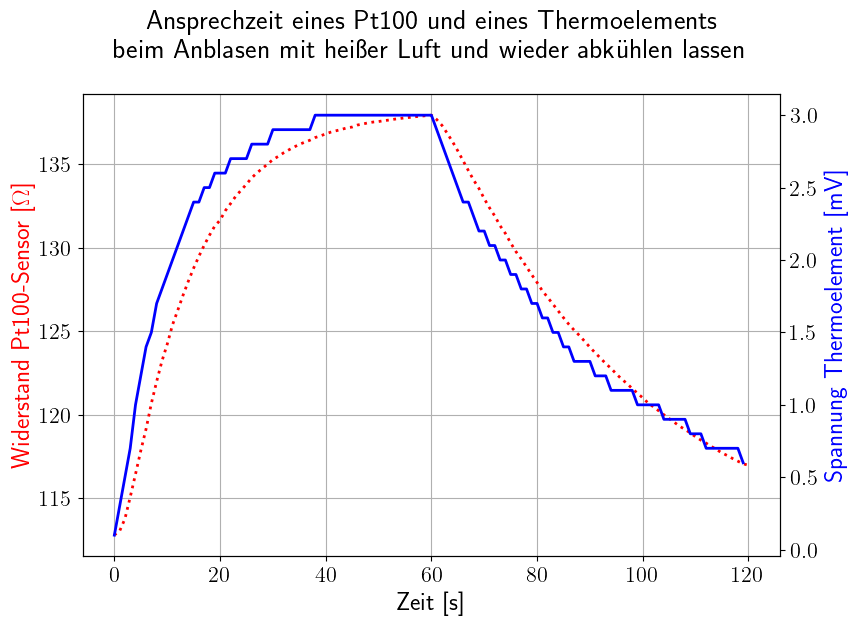

In [4]:
fig,ax1=plt.subplots(figsize=(9,6))
ax1.set_title('Ansprechzeit eines Pt100 und eines Thermoelements \nbeim Anblasen mit heißer Luft und wieder abkühlen lassen'+"\n")
ax2=ax1.twinx()
lns1=ax1.plot(1e-9*dfzeit1,df['Messwert'],'r:',label='Pt100')
lns2=ax2.plot(1e-9*dfzeit2,1e3*df2['Messwert'],'b-',label='Thermoelement')
ax1.set_xlabel('Zeit [s]')
ax2.set_xlabel('Zeit [s]')
ax1.set_ylabel(r'Widerstand Pt100-Sensor [$\Omega$]', color='red')
ax2.set_ylabel('Spannung Thermoelement [mV]', color = 'blue')
ax1.grid()
plt.show()

:::{admonition} **AUFGABE**
Was sieht man in den Messkurven? Wie heiß ist die heiße Luft? Woher kommen die Stufen in der Thermoelement-Messkurve? Welche Genauigkeit erreicht man mit dem jeweiligen Sensor?

Was könnte man am Messaufbau verändern, um genauer zu messen?
:::

*Antwort:...*

Die Art der Wärmeübertragung ist bestimmt durch den Messaufbau. Auch ein hochgenaues Sensorelement wird, wenn es entsprechend aufgebaut wird, verfälschte Signale messen. Beispielsweise können Kontakt-Thermometer durch Wärmestrahlung (z. B. in der Sonne) verstärkt aufgeheizt werden, so dass sie einen verfälschten Wert ausgeben.

## Widerstandsthermometer

### (Fast) linear temperaturabhängige Widerstände

Grundsätzlich ist jeder elektrische Widerstand mehr oder wenig stark von der Temperatur abhängig. Für Sensorelemente wird dieser Effekt mit definierten Materialien ausgenutzt.

Metallische Widerstände sind geeignet, um Temperaturen recht genau zu messen {cite:p}`hesselbach_energie-_2012`:
- elektrischer Widerstand $R = f(T)$
- häufig metallische Widerstände mit reproduzierbarem Verhalten
- bis zu $10^{-4}$ Messunsicherheit erreichbar
- Platin: sehr gute Linearität zwischen -220°C und 850°C
- Pt100 mit $100\text{ }\Omega$ bei 0°C bis Pt9000 mit $9000\text{ }\Omega$ bei 0°C
- $R(\vartheta) = R_{ref}(\vartheta_{ref})\cdot(1+\alpha_{ref}\cdot(\vartheta-\vartheta_{ref})+\beta_{ref}\cdot(\vartheta-\vartheta_{ref})^2 + ..$ mit $\alpha_{ref}$, dem linearen und $\beta_{ref}$, dem quadratischen Temperaturkoeffizienten bei der Referenztemperatur $\vartheta_{ref}$
- häufige Näherung: mittlerer Temperaturbeiwert $\alpha'$ zwischen 0°C und 100°C
- $\alpha' = \frac{R(\vartheta=100°C)-R(\vartheta=0°C)}{R(\vartheta=0°C)\cdot 100\text{ K} } \to R(\vartheta) = R_0\cdot(1+\alpha' \vartheta)$ mit $\alpha_{Pt}' = 3,85\cdot10^{-3}\text{/K}$

Häufig verwendet: Pt100
- Pt steht für Platin(-Keramik)
- 100 steht für $100\text{ }\Omega$ bei 0°C

In [5]:
T=np.linspace(-50,150,1000)
T0 = 0
R0=100
alpha0=3.851e-3
A=3.9083e-3
B=5.775e-7
R=R0*(1+alpha0*T)
Rgenau=R0*(1+A*T+B*T**2)
data = {'Temperatur [°C]': T,
       'linearisiert': R,
       'Polynom': Rgenau}
df = pd.DataFrame(data)

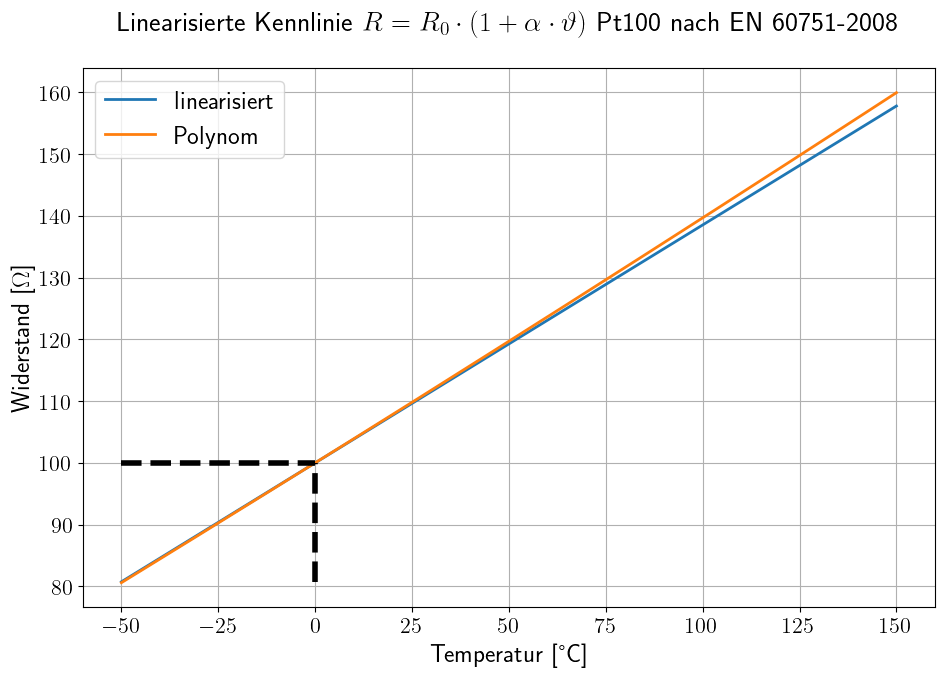

In [6]:
df.plot(x='Temperatur [°C]', title = r'Linearisierte Kennlinie $R=R_0\cdot(1+\alpha\cdot\vartheta)$ Pt100 nach EN 60751-2008'+"\n", figsize=(11,7))
plt.ylabel(r'Widerstand [$\Omega$]')
plt.plot([np.min(T),T0],[R0,R0],'k--',linewidth=4)
plt.plot([T0,T0],[np.min(R),R0],'k--',linewidth=4)
plt.grid()
plt.show()

Der Pt100-Sensor im Labor ist als Tauchsensor ausgeführt. Er besitzt einen Edelstahlmantel, der den Sensor schützt, wenn z. B. Flüssigkeiten gemessen werden sollen. Allerdings erhöht dieser Mantel auch die Temperaturkapazität, weshalb die Ansprechzeit wie in der vorigen Abbildung gezeigt höher ist.

### Messstrom: eine Quelle für Messunsicherheiten

Eine mögliche Messchaltung zeigt das folgende Diagramm (nach {cite:p}`hesselbach_energie-_2012`):

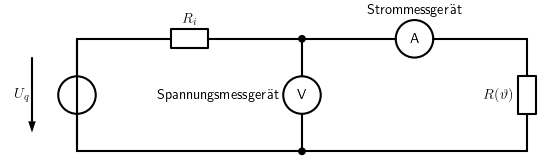

In [7]:
schemdraw.config(lw=2, font='serif')
with schemdraw.Drawing() as d:
    elm.style(elm.STYLE_IEC)
    d += elm.Resistor(label=r'$R_i$',l=6)
    d += elm.Dot()
    d.push()
    d += elm.MeterA(d='right', l=6, label='Strommessgerät')
    d += elm.Resistor(d='down', label=r'$R(\vartheta)$')
    d += elm.Line(d='left', l=6)
    d += elm.Dot()
    d.pop()
    d += elm.MeterV(d='down', label='Spannungsmessgerät')
    d += elm.Line(d='left',l=6)
    d.push()
    d += (Uq := elm.Source(d='up'))
    d += elm.CurrentLabel(ofst=.7, reverse=True).at(Uq).label('$U_q$')
    d.pop()
    d += elm.Line(d='up')

Stromwärme reduziert die Messgenauigkeit {cite:p}`hesselbach_energie-_2012`:
- Messstrom darf Widerstand nicht nennenswert erwärmen
- bei $100\text{ }\Omega$-Widerständen $<10\text{ mA}$  
- Wärmekapazität des Messobjektes und ggf. schlechte thermische Ankopplung berücksichtigen
- Bauart von Sensoren inkl. Schutzrohr entscheidend für Lebensdauer und Stabilität der Messung
- 4-Leiter-Messung genauer als 3-Leiter-Messung, genauer als 2-Leiter-Messung, warum?

### Vor- und Nachteile von Platinsensoren

Beispiel Genauigkeit von Platinsensoren: 
- Klasse A $d\vartheta = \pm(0,15°C + 0,002\cdot\vartheta)$
- Klasse B $d\vartheta = \pm(0,30°C + 0,005\cdot\vartheta)$
- 1/3 Klasse B: $\pm\frac{1}{3}\cdot(0,30°C + 0,005\cdot\vartheta)$

Vorteile von Widerstandsthermometern:
- Einsatz in hohen Temperaturbereichen
- Vibrationsfestigkeit
- Langzeitstabilität
- hohe Robustheit
- hohe Genauigkeit und Reproduzierbarkeit von Messungen

Nachteil von Widerstandsthermometern
- längere Ansprechzeiten als Thermoelemente

### Weitere Widerstands-Thermometer

**NTC-Sensoren**
NTC (negative temperature coefficient) steht für Sensoren aus Halbleitern, deren Widerstand mit zunehmender Temperatur *abnimmt*.

**PTC-Sensoren** PTC (positive temperature coefficient) steht für Sensoren aus Keramik-Materialien, die sich bis zur sog. *Sprungtemperatur* wie Halbleiter verhalten, d.h. deren Widerstand mit der Temperatur zunächst abnimmt. Ab der Sprungtemperatur beginnen elektrische Felder an den Korngrenzen des Materials ein so große Rolle zu spielen, dass der Widerstand sprunghaft um mehrere Größenordnungen zunimmt. Diese Sensoren werden häufig als Temperatursicherungen eingesetzt: Z. B. reduziert sich der Strom über solch einem Sensor bei Überschreiten der kritischen Temperatur sehr stark, so dass z. B. ein Motor vor Überhitzung geschützt werden kann.

## Thermoelemente

### Funktionsprinzip

Thermoelemente bestehen aus zwei Metallen, die an einer Stelle elektrisch verbunden sind. Dies ist im Allgemeinen die Messstelle. Wenn die beiden Metalle an einer anderen Stelle eine andere Temperatur haben, so stellt sich eine Temperaturspannung ein, die proportional zur Temperaturdifferenz zwischen Messstelle und Referenzstelle ist (Seebeck-Effekt). In der DIN EN 60584-1:2013 finden sich 10 genormte Materialpaarungen. Am gebräuchlichsten sind Typ K (Nickel/Chrom-Nickel) und Typ J (Eisen-Kupfer/Nickel).

![Thermoelement](../img/thermoelement.png)

Thermospannung von Thermoelementen:
- materialabhängige Konstante $k_{AB}$
- $U_T = k_{AB} \cdot (\vartheta_M - \vartheta_0)$

Beispiele für Thermopaare:
- Eisen-Konstantan (Fe-Konst, Buchstabe J)
- Kupfer-Konstantan (Cu-Konst, Buchstabe T)
- NiCr-CuNi, Buchstabe E
- Standard: Nickel-Chrom/Nickel-Aluminium (NiCr-NiAl, Typ K): gute Linearität bis 1000°C, Unsicherheit ca. 1,5 K im Bereich -40°C bis 375°C {cite:p}`hesselbach_energie-_2012`

Vor- und Nachteile:
- Vorteile: geringe Kosten, sehr schnelles Ansprechverhalten
- Nachteile: absolute Messunsicherheit ca. $\pm2,5\text{ K}$ {cite:p}`hesselbach_energie-_2012` deutlich höher als bei Widerstandsthermometern - Nachkalibrieren mit Pt100

- Referenztemperatur: 
 - Messung mit Pt100 beim Übergang auf Kupferkabel
 - direkte elektrische Kompensation

### Häufig verwendet: Thermoelement Typ K

Für den Thermoelementtyp K gilt im Temperaturbereich von 0°C bis 1300°C:

In [8]:
T=np.linspace(0,150,151)
U=[0,39,79,119,158,198,238,277,317,357,#
    397,437,477,517,557,597,637,677,718,758,#
    798,838,879,919,960,1000,1041,1081,1122,1163,#
    1203,1244,1285,1326,1366,1407,1448,1489,1530,1571,#
    1612,1653,1694,1735,1776,1817,1858,1899,1941,1982,#
    2023,2064,2106,2147,2188,2230,2271,2312,2354,2395,#
    2436,2478,2519,2561,2602,2644,2685,2727,2768,2810,#
    2851,2893,2934,2976,3017,3059,3100,3142,3184,3225,#
    3267,3308,3350,3391,3433,3474,3516,3557,3599,3640,#
    3682,3723,3765,3806,3848,3889,3931,3972,4013,4055,#
    4096,4138,4179,4220,4262,4303,4344,4385,4427,4468,#
    4509,4550,4591,4633,4674,4715,4756,4797,4838,4879,#
    4920,4961,5002,5043,5084,5124,5165,5206,5247,5288,#
    5328,5369,5410,5450,5491,5532,5572,5613,5653,5694,#
    5735,5775,5815,5856,5896,5937,5977,6017,6058,6098,#
    6138]
data = {'Temperatur [°C]': T,
       'Thermoelement-Spannung [µV]': U}
dth = pd.DataFrame(data)

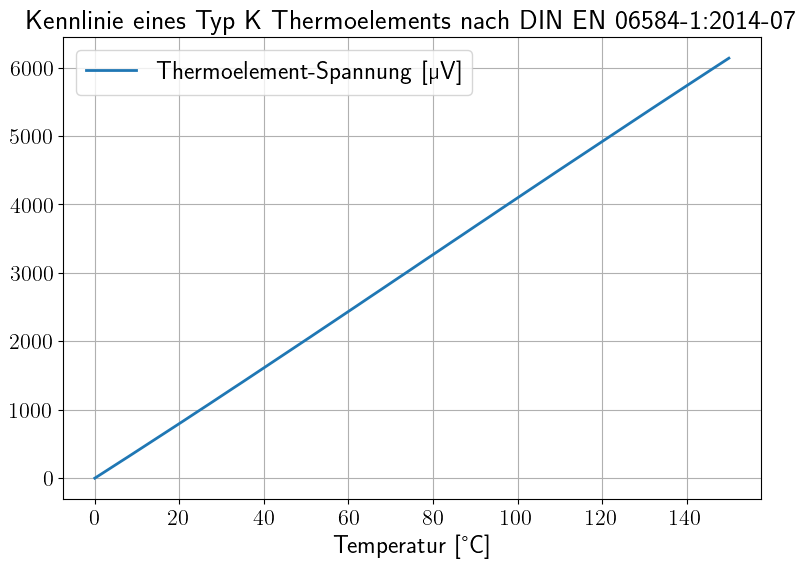

In [9]:
dth.plot(x='Temperatur [°C]', title='Kennlinie eines Typ K Thermoelements nach DIN EN 06584-1:2014-07', figsize=(9,6))
plt.grid()
plt.show()

## Fest verbaute Temperatursensoren

In den meisten Fällen handelt es sich bei fest verbauten Temperatursensoren um Kontakt-Thermometer, nicht um optische Temperatursensoren. Daher hier ein paar Worte dazu.

Für die Funktion sind in vielen Geräten und Anlagen Temperatursensoren unerlässlich: Technologische Prozesse (z. B. ein Lötprozess) funktionieren nur bei bestimmten Temperaturen zuverlässig. Die notwendige Heiz- oder Kühlleistung in Gebäuden hängt von den vorhandenen Temperaturen im und um das Gebäude ab. Außerdem haben viele Geräte automatische Abschaltmechanismen, die bei Über- oder Untertemperatur (letzteres seltener) greifen: Beispielsweise muss das Batteriemanagementsystem einer Lithium-Ionen-Batterie deren Betrieb bei Über- oder Untertemperatur verweigern.

Aus den Daten von sowieso vorhandenen Temperatursensoren lassen sich Rückschlüsse auf Einsparpotenziale ziehen - sofern diese Daten mitgeloggt (mitgeschrieben) werden. Meist ist letzteres nicht der Fall. Denn ein Logger benötigt Speicherplatz und Kommunikationsmöglichkeiten zum Auslesen. Wenn es Auslesemöglichkeiten gibt, kann man jedoch auch auf solche Sensoren zurückgreifen.

:::{admonition} **AUFGABE**
Wo hat das Gerät in Ihrem Projekt Temperatursensoren? In welchen Temperaturbereichen arbeiten diese? Welche Funktion erfüllen diese Temperatursensoren (d.h. wozu messen sie die Temperatur)? Wie hoch ist die angezeigte Temperatur? Ist das sinnig?
:::

*Antwort:...*

| Android Smartphone | Linux Rechner |
|---|---|
| App `Temp.monitor` | Konsole `sensors` |
| ![Screenshot Temperaturen Smartphone](../img/Screenshot_20211014-205856_Temp._monitor.png) | ![Screenshot Konsole Ausgabe](../img/linux-sensors-befehl.png) |

Es gibt auch ähnliche Funktionen für Windows- {cite:p}`markus_kasanmascheff_windows_2020` und Mac-Rechner {cite:p}`wiesend_gpu-temperatur_2019`.

:::{admonition} **AUFGABE**
Wie hoch ist die Temperatur an den verschiedenen Sensoren in Ihrem Smartphone? Und wie hoch ist sie in dem Raum, in dem Sie sich aufhalten?
:::

*Antwort: Gemessen mit der App ... und der Funktion ... ergibt sich für die Batterietemperatur ... , die Prozessortemperatur ..., die Temperatur des Sensors (welcher?) ... Die Raumtemperatur in dem Aufenthaltsraum (Raum: ...) beträgt ...*

Auch vom Hersteller bereitgestellte Sensoren können natürlich fehlerhafte Messwerte ausgeben. Daher ist immer eine Plausibilitätsprüfung notwendig. Da eine genaue Kalibrierung teuer ist, ist auch nicht davon auszugehen, dass Sensoren genauer sind als sie sein müssen. Ein gesundes Misstrauen ist also angebracht. Dennoch geben fest eingebaute Sensoren häufig gute Anhaltspunkte.

:::{bibliography}
:filter: docname in docnames
:::